In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train_data = pd.read_csv("cs-training.csv")
test_data = pd.read_csv("cs-test.csv")
submission = pd.read_csv("sampleEntry.csv")

# Checking Data

In [3]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
submission.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [6]:
#changing column name typo 

data = [train_data, test_data]

for i in data:
    i.rename(columns={"Unnamed: 0":"Id"}, inplace=True)

In [7]:
train_data

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [8]:
test_data

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [9]:
train_data.nunique() # Uniqueness for data visualization

Id                                      150000
SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [10]:
test_data.nunique() # same 

Id                                      101503
SeriousDlqin2yrs                             0
RevolvingUtilizationOfUnsecuredLines     85716
age                                         82
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                                79878
MonthlyIncome                            11976
NumberOfOpenCreditLinesAndLoans             56
NumberOfTimes90DaysLate                     18
NumberRealEstateLoansOrLines                24
NumberOfTime60-89DaysPastDueNotWorse        12
NumberOfDependents                          13
dtype: int64

In [11]:
train_data.isnull().sum() # Testing null variable

Id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [12]:
test_data.isnull().sum() # same

Id                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [13]:
train_data['SeriousDlqin2yrs'].value_counts()/train_data.shape[0]

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

Imbalanced

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'SeriousDlqin2yrs'}, ylabel='SeriousDlqin2yrs'>

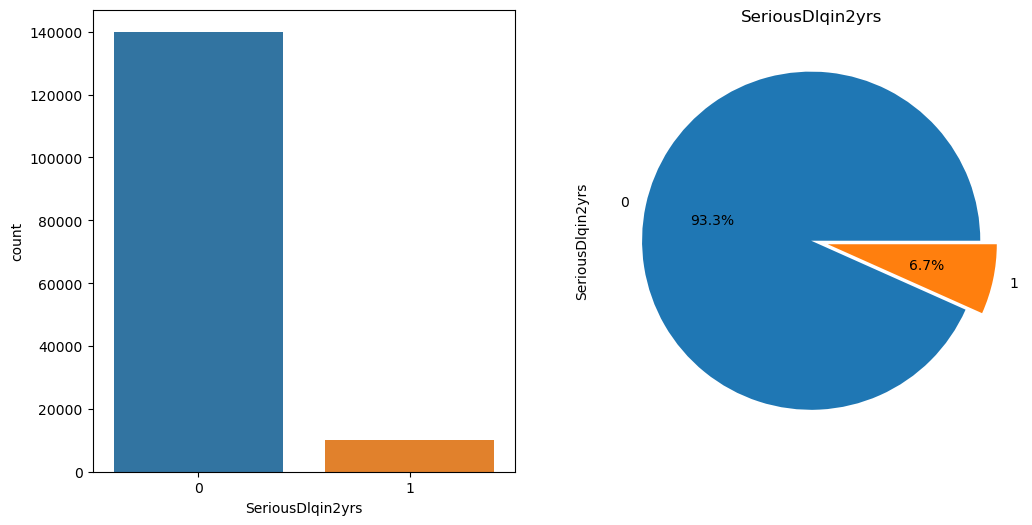

In [14]:
target_count = train_data["SeriousDlqin2yrs"].value_counts()
fig, axis = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot("SeriousDlqin2yrs", data=train_data, ax=axis[0])

axis[1].set_title("SeriousDlqin2yrs")
target_count.plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=axis[1])

Counting people with debt over 90 days with barchart and pie chart 
0 = Doesn't has debt 
1 = has debt

From the results of the visualization and balance calculations above, we can conclude that the data we have is unbalanced, because the ratio of the 2 values (1 & 0) is 14:1. Generally, the criteria for good data are those that have a ratio of approximately 50:50. Therefore, we cannot rely heavily on accuracy scores to predict model success. However, Resampling Techniques such as SMOTE and Under/Oversampling will improve the model used.

<AxesSubplot:>

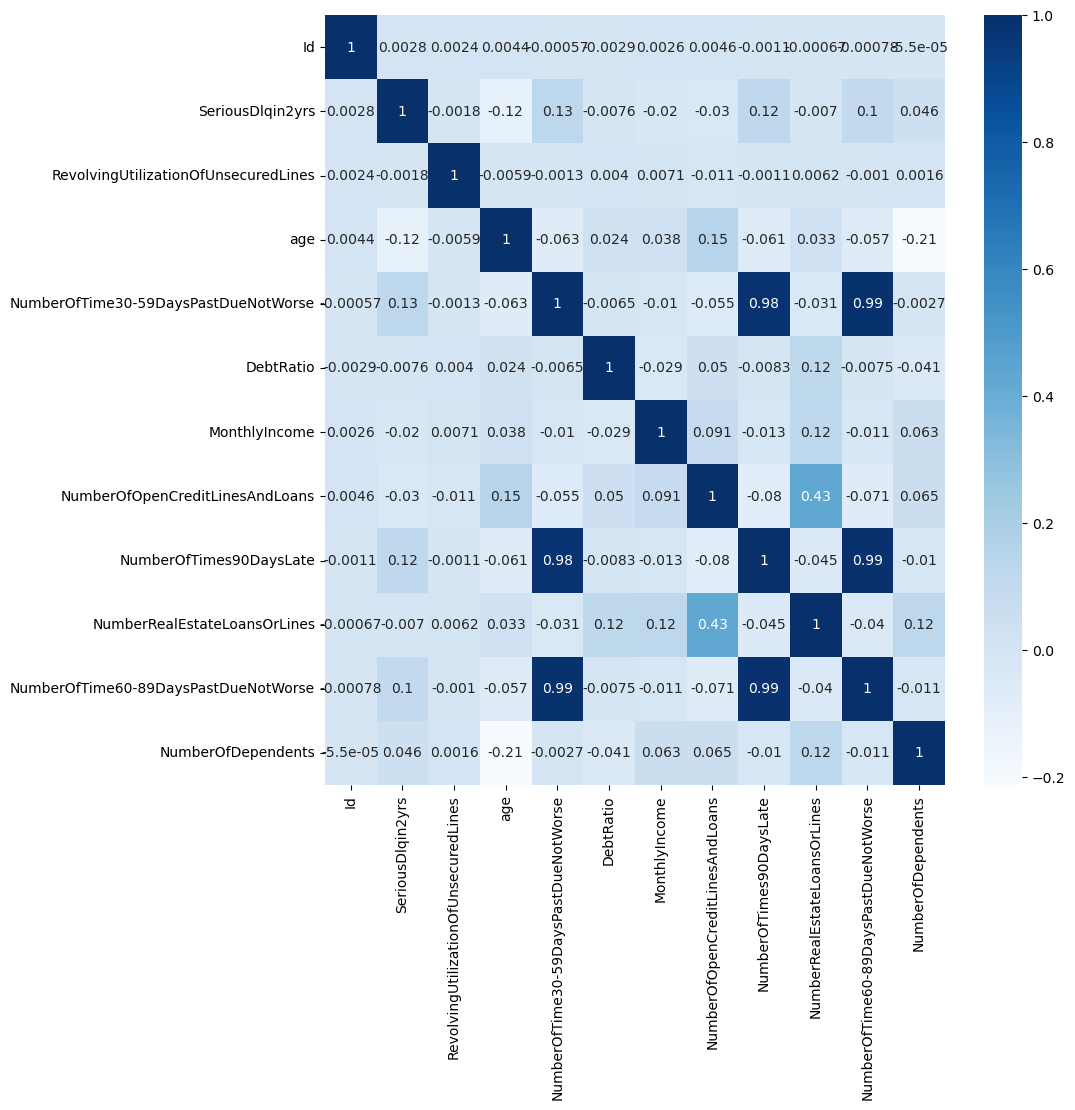

In [15]:
# Heatmap Correlation 

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="Blues", ax=ax)

Text(0, 0.5, 'Total')

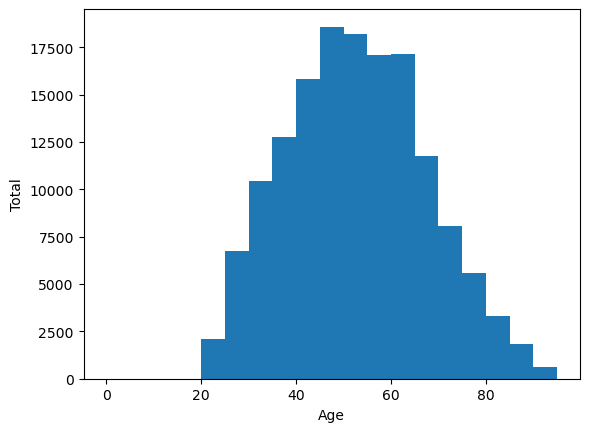

In [16]:
# Age data 

age_bins = [e for e in range(0, 100, 5)]

plt.hist(train_data["age"], bins=age_bins)

plt.xlabel("Age")
plt.ylabel("Total")

# Feature Engineering

In [17]:
# Removing Outliers 

from scipy import stats

def remove_outliers(df, atribute_name, max_scale_from_std):
    f = df[atribute_name]
    std = f.std()
    distance_from_mean = f - f.mean()
    condition = np.abs(distance_from_mean) >= max_scale_from_std * std
    df.loc[condition, atribute_name] = f.mean()
    return df

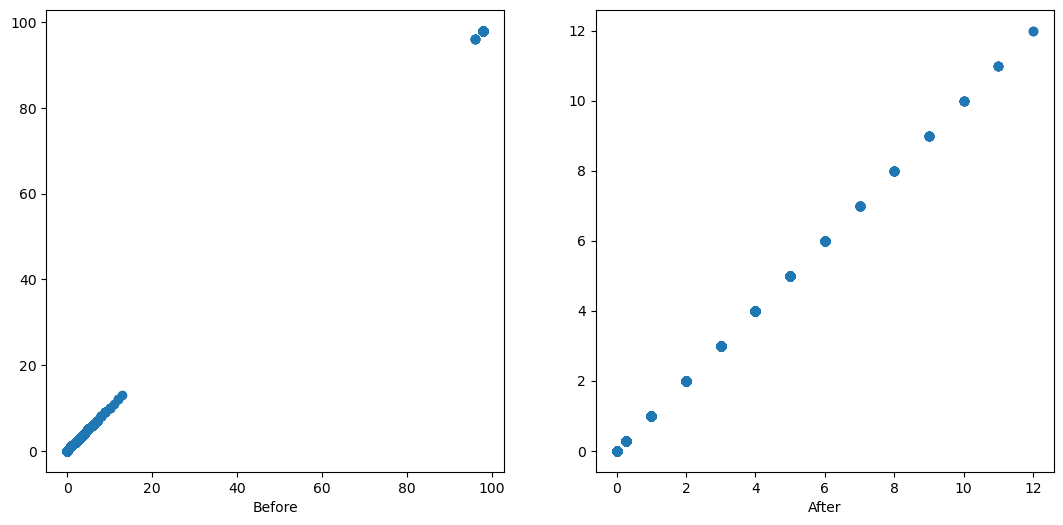

In [18]:
first_atribute = train_data["NumberOfTime30-59DaysPastDueNotWorse"]
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(first_atribute, first_atribute)
axes[0].set_xlabel("Before")

train_data = remove_outliers(train_data, "NumberOfTimes90DaysLate", 3)
first_atribute = train_data["NumberOfTimes90DaysLate"]
axes[1].scatter(first_atribute, first_atribute)
axes[1].set_xlabel("After")

plt.show()

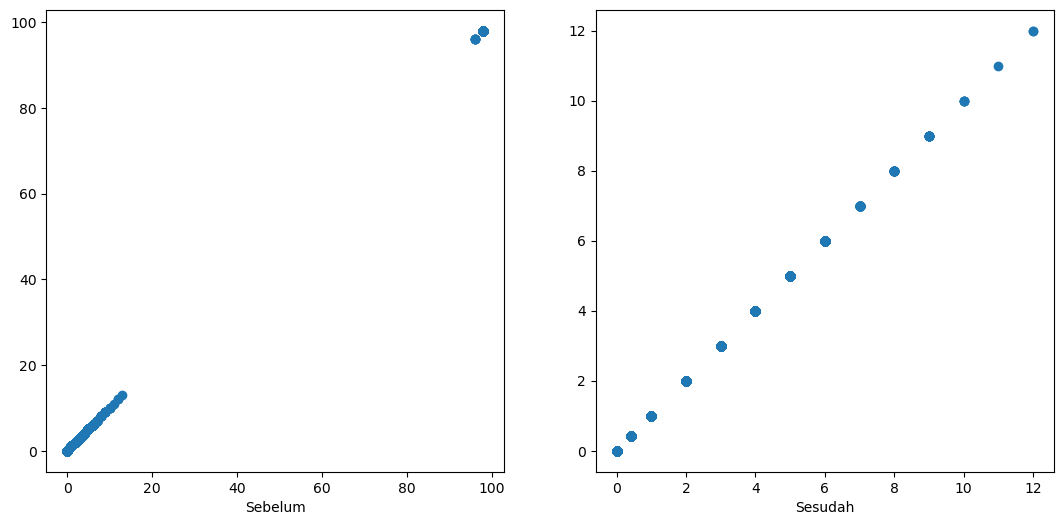

In [19]:
second_atribute = train_data['NumberOfTime30-59DaysPastDueNotWorse']

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(second_atribute, second_atribute)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(train_data, "NumberOfTime30-59DaysPastDueNotWorse", 3)
second_atribute = train_data["NumberOfTime30-59DaysPastDueNotWorse"]
axes[1].scatter(second_atribute, second_atribute)
axes[1].set_xlabel("Sesudah")

plt.show()

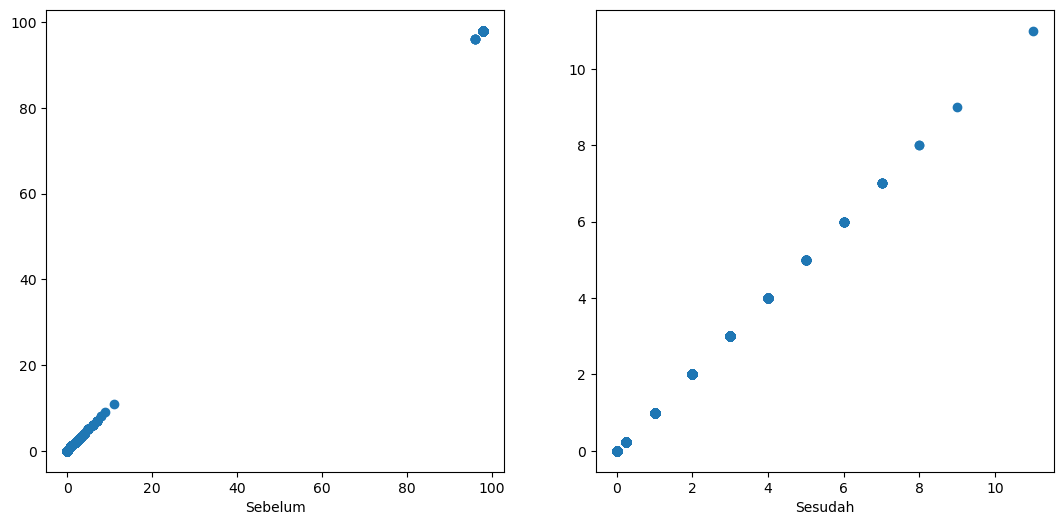

In [20]:
third_atribute = train_data['NumberOfTime60-89DaysPastDueNotWorse']

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(third_atribute, third_atribute)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(train_data, "NumberOfTime60-89DaysPastDueNotWorse", 3)
third_atribute = train_data["NumberOfTime60-89DaysPastDueNotWorse"]
axes[1].scatter(third_atribute, third_atribute)
axes[1].set_xlabel("Sesudah")

plt.show()

# Data Pre Processing 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

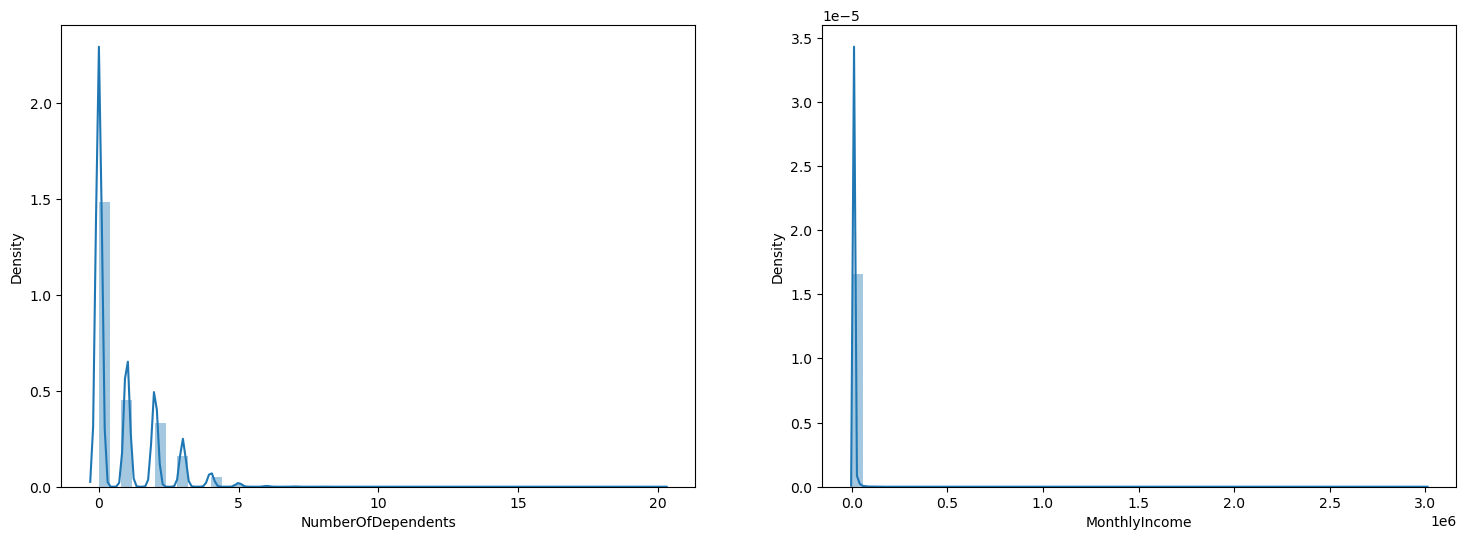

In [21]:
# Fill null values

fig, ax = plt.subplots(figsize=(18, 6), ncols=2)
sns.distplot(train_data["NumberOfDependents"], ax=ax[0])
sns.distplot(train_data["MonthlyIncome"], ax=ax[1])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

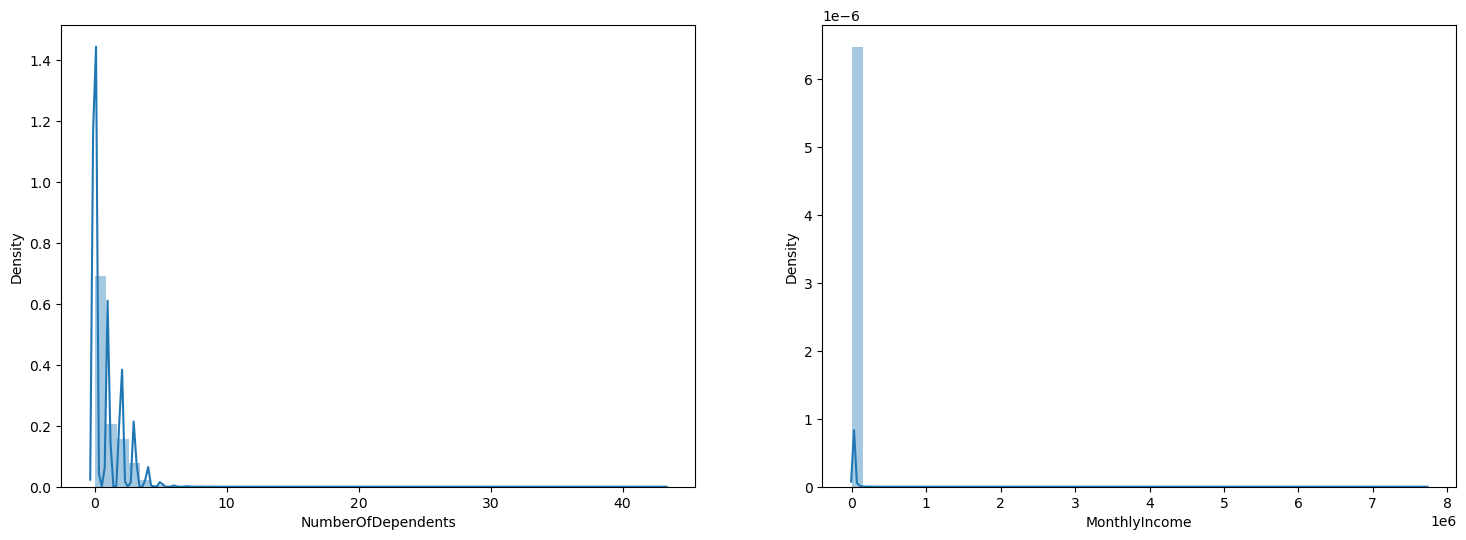

In [22]:
fig, ax = plt.subplots(figsize=(18, 6), ncols=2)
sns.distplot(test_data["NumberOfDependents"], ax=ax[0]) 
sns.distplot(test_data["MonthlyIncome"], ax=ax[1])

In [23]:
# Data Training

number_of_dependents_train = train_data["NumberOfDependents"]
number_of_dependents_train_mean = number_of_dependents_train.mean()
number_of_dependents_train_median = number_of_dependents_train.median()
number_of_dependents_train_mode = number_of_dependents_train.mode().mean()

monthly_income_train = train_data["MonthlyIncome"]
monthly_income_train_mean = monthly_income_train.mean()
monthly_income_train_median = monthly_income_train.median()
monthly_income_train_mode = monthly_income_train.mode().mean()

print("Data Training")
print("Number Of Dependents")
print("Mean NOD:", number_of_dependents_train_mean)
print("Median NOD:", number_of_dependents_train_median)
print("Mod Mean NOD:", number_of_dependents_train_mode)
print("")
print("Monthly Income")
print("Mean MI:", monthly_income_train_mean)
print("Median MI:", monthly_income_train_median)
print("Mod Mean MI:", monthly_income_train_mode)

Data Training
Number Of Dependents
Mean NOD: 0.7572222678605657
Median NOD: 0.0
Mod Mean NOD: 0.0

Monthly Income
Mean MI: 6670.221237392844
Median MI: 5400.0
Mod Mean MI: 5000.0


In [24]:
# Data Testing

number_of_dependents_test = test_data["NumberOfDependents"]
number_of_dependents_test_mean = number_of_dependents_test.mean()
number_of_dependents_test_median = number_of_dependents_test.median()
number_of_dependents_test_mode = number_of_dependents_test.mode().mean()

monthly_income_test = test_data["MonthlyIncome"]
monthly_income_test_mean = monthly_income_test.mean()
monthly_income_test_median = monthly_income_test.median()
monthly_income_test_mode = monthly_income_test.mode().mean()

print("Data Testing")
print("Number Of Dependents")
print("Mean NOD:", number_of_dependents_test_mean)
print("Median NOD:", number_of_dependents_test_median)
print("Mod Mean NOD:", number_of_dependents_test_mode)
print("")
print("Monthly Income")
print("Mean MI:", monthly_income_test_mean)
print("Median MI:", monthly_income_test_median)
print("Mod Mean MI:", monthly_income_test_mode)

Data Testing
Number Of Dependents
Mean NOD: 0.7690463909705998
Median NOD: 0.0
Mod Mean NOD: 0.0

Monthly Income
Mean MI: 6855.0355896805895
Median MI: 5400.0
Mod Mean MI: 5000.0


In [25]:
# Fill Null Values

train_data['NumberOfDependents'].fillna(number_of_dependents_train_mode, inplace=True)
train_data['MonthlyIncome'].fillna(monthly_income_train_mode, inplace=True)

test_data['NumberOfDependents'].fillna(number_of_dependents_test_mode, inplace=True)
test_data['MonthlyIncome'].fillna(monthly_income_test_mode, inplace=True)

In [26]:
train_data.isnull().sum()

Id                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [27]:
test_data.isnull().sum()

Id                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

# Modelling and Predicting 

In [28]:
# Partition into X and y
# SeriousDlqin2yrs is deleted because it's just used for testing
X = train_data.drop("SeriousDlqin2yrs", axis=1)
y = train_data["SeriousDlqin2yrs"]

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  float64
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 10  NumberOfDependents                    150000 non-null  float64
dtype

In [30]:
# Modelling 
# Testing model to find the best the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

parameter = {
    'n_estimators': [9,27,36],
    'max_depth': [3,7,9],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestClassifier()

In [32]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_search = RandomizedSearchCV(rf, param_distributions=parameter, cv=5)

In [33]:
random_forest_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 7, 9],
                                        'min_samples_leaf': [2, 4],
                                        'n_estimators': [9, 27, 36]})

In [34]:
# best parameter for random forest
best_estimator_rf = random_forest_search.best_estimator_
best_estimator_rf

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=36)

In [35]:
print("training accuracy: {:.2f}".format(random_forest_search.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(random_forest_search.score(x_test, y_test) * 100))

training accuracy: 93.89
validation accuracy: 93.74


# Light GBM

In [36]:
import sys
!{sys.executable} -m pip install lightgbm

In [37]:
from lightgbm import LGBMClassifier

parameter = {
    'n_estimators': [100, 250],
    'max_depth': [8, 24],
    'num_leaves': [25, 50],
    'first_metric_only': [True]
}


lgb = LGBMClassifier()

In [38]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator=lgb,
    param_grid=parameter,
    cv=5,
)

lgbm_fit = gs.fit(x_train, y_train)

print(lgbm_fit.best_score_)
print(lgbm_fit.best_params_)

0.9364285714285714
{'first_metric_only': True, 'max_depth': 24, 'n_estimators': 100, 'num_leaves': 25}


In [39]:
print("training accuracy: {:.2f}".format(gs.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(gs.score(x_test, y_test) * 100))

training accuracy: 94.10
validation accuracy: 93.68


# Logistic Regresion 

In [40]:
from sklearn.linear_model import LogisticRegression

parameter = {
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2', 'elasticnet'],
    'C': [ 1e-1, 1],
}

lr = LogisticRegression()

In [41]:
%%capture --no-display

gs_lr = GridSearchCV(
    estimator=lr,
    param_grid=parameter,
    cv=5,
)

lr_fit = gs_lr.fit(x_train, y_train)


In [42]:
print(lr_fit.best_score_)
print(lr_fit.best_params_)

0.9357809523809524
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [43]:
print("training accuracy: {:.2f}".format(gs_lr.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(gs_lr.score(x_test, y_test) * 100))

training accuracy: 93.59
validation accuracy: 93.74


# Confusion Matrix

In [44]:
# Using Random Forest for the best Model

continous_proba = random_forest_search.best_estimator_.predict_proba(x_test)

proba = continous_proba[:, 1]
proba[proba >= 0.5] = 1
proba[proba < 0.5] = 0
proba = proba.astype(int)

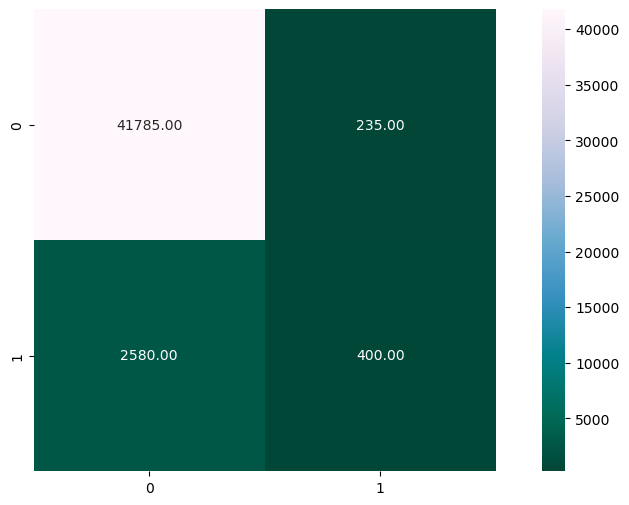

In [45]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, proba) # returning probability 1 

plt.figure(figsize=(12, 6))

sns.heatmap(matrix, annot=True, fmt=".2f", square=True, cmap="PuBuGn_r")
plt.show()

# Classification Report

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, proba))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     42020
           1       0.63      0.13      0.22      2980

    accuracy                           0.94     45000
   macro avg       0.79      0.56      0.59     45000
weighted avg       0.92      0.94      0.92     45000



# AUC ROC

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, proba)

0.5643178064775801

Text(0, 0.5, 'Rate of True Positive')

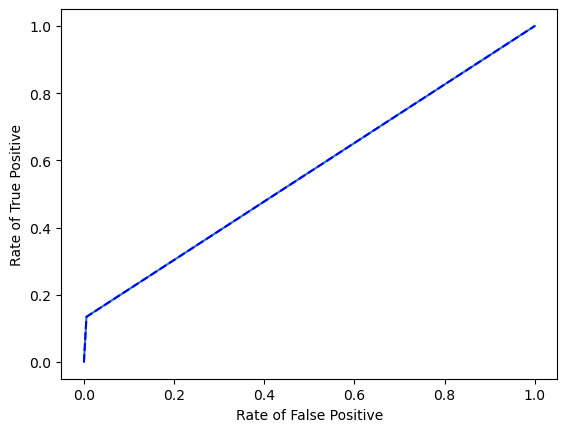

In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, continous_proba[:, 1])

plt.plot(fpr, tpr)
plt.plot(fpr, tpr, linestyle = "--", color ="b")
plt.xlabel("Rate of False Positive")
plt.ylabel("Rate of True Positive")

In [49]:
submission

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [50]:
X = test_data.drop(["SeriousDlqin2yrs"], axis = 1)
y = lr_fit.predict_proba(X)[:, 1]

ids = X.index.values

In [51]:
predict = pd.DataFrame({"Id" : ids, "Probability " : y})
predict.to_csv("submission.csv", index = False)

In [52]:
predict

,Id,Probability
0,0,0.050653
1,1,0.037860
2,2,0.032610
3,3,0.118761
4,4,0.091626
...,...,...
101498,101498,0.097246
101499,101499,0.277450
101500,101500,0.019033
101501,101501,0.068215
